# Score Based Comparisons

This notebook generates a set of visualizations relevant to the research question. However, the interpretation/analysis can be found in the accompanying paper. It is worth noting to the reader of this notebook that the overlapping sanaa pairs were found by manual checks of the lyrics files, and the result was stored in the overlaps list of tuples in Step 1) notebook. In this notebook, crossmizan_pairs holds the subset of overlapping sanaa pairs for which plots were generated

In [12]:
from music21 import *
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from math import ceil

score_snippets = 'score_dest/'
audio_snippets = 'audio_dest/'

score_source_dir = 'score_source/'

dataset_file = 'arab_andalusian_lines.csv'

nawbas = {'f7bcb9af-6abb-4192-ae3d-37fa811034ce': 'quddam',
         '8842c1f0-e261-4069-bd59-768bb9a3315c': 'darj',
         'a451a7fc-c53f-462a-b3fc-4377bb588105': 'btayhi'}

#lists with beats that have a starting note
darj_beats_mu = [1.0, 1.5, 2.5, 3.5, 4]
darj_beats_ma = darj_beats_mu
darj_beats_in = darj_beats_mu
btayhi_beats_mu = [2, 4, 5.5, 7, 8]
btayhi_beats_ma = btayhi_beats_mu
btayhi_beats_in = [1.75, 2.5, 4, 4.5]
quddam_beats_mu = [1.5, 2, 3]
quddam_beats_ma = quddam_beats_mu
quddam_beats_in =  quddam_beats_mu #[2, 3, 4, 5]

#dictionary beats
mizan_dict = {
    'darj_mu': darj_beats_mu,
    'darj_ma': darj_beats_ma,
    'darj_in': [1, 2, 4, 6, 7], #re-read as 8/8 from book
    'btayhi_mu': btayhi_beats_mu,
    'btayhi_ma': btayhi_beats_ma,
    'btayhi_in': [2.5, 4, 7, 8], #re-read as 8/8 from book
    'quddam_mu': quddam_beats_mu,
    'quddam_ma': quddam_beats_ma,
    'quddam_in': quddam_beats_in
}

crossmizan_pairs = [('f7bcb9af-6abb-4192-ae3d-37fa811034ce-mu.2-[Barwala].xml', '8842c1f0-e261-4069-bd59-768bb9a3315c-mu.2-[Barwala].xml'),
                   ('8842c1f0-e261-4069-bd59-768bb9a3315c-in.2-[Zejel].xml', 'a451a7fc-c53f-462a-b3fc-4377bb588105-in.2-[Zejel].xml'), 
                   ('8842c1f0-e261-4069-bd59-768bb9a3315c-in.3-[Zejel].xml', 'a451a7fc-c53f-462a-b3fc-4377bb588105-in.4-[Zejel].xml'),
                   ('8842c1f0-e261-4069-bd59-768bb9a3315c-in.4-[Zejel].xml', 'a451a7fc-c53f-462a-b3fc-4377bb588105-in.5-[Zejel].xml'), 
                   ('8842c1f0-e261-4069-bd59-768bb9a3315c-in.5-[Zejel].xml', 'a451a7fc-c53f-462a-b3fc-4377bb588105-in.6-[Zejel].xml')]


## Methodology: San'a Pair Comparison
The idea here is to see how many notes start at each beat for all the score corresponding to each sanaa. This could be a way to represent how the rhythmic changes the sanaa's melody distribution into the beats of the bar. More details can be found in the accompanying paper on how this relates to the initial question.

The following function analyzes the scores of a san'a across 2 myazin, and generates the plots for them. Red lines in plots correspond to the main beats of each mizān. 

In [27]:
def show_pair(score_snippets_dir, pair, label, mizan_dict, nawbas): #by label: muwassa, mahzuz, or insiraf
    stream1 = converter.parse(score_snippets_dir + pair[0])
    stream2 = converter.parse(score_snippets_dir + pair[1])
    
    notes_stream1 = stream1.parts[0].flat.notes.stream()
    notes_stream2 = stream2.parts[0].flat.notes.stream()
    
    beatsDict1 = {}
    for n in notes_stream1:
        beatsDict1[n.beat] = beatsDict1.get(n.beat, 0) + 1
        
    beatsDict2 = {}
    for n in notes_stream2:
        beatsDict2[n.beat] = beatsDict2.get(n.beat, 0) + 1 
        
    #plots
    xValues1 = sorted(beatsDict1.keys())
    yValues1 = [beatsDict1[x] for x in xValues1]

    xValues2 = sorted(beatsDict2.keys())
    yValues2 = [beatsDict2[x] for x in xValues2]
    
    mbid1 = pair[0][:36]
    mbid2 = pair[1][:36]
    
    beats_theory1 = mizan_dict["{}_{}".format(nawbas[mbid1], label)]
    beats_theory2 = mizan_dict["{}_{}".format(nawbas[mbid2], label)]
    
    plt.subplot(1, 2, 1)
    plt.title(pair[0][:5]+ pair[0][36:])
    plt.bar(xValues1, yValues1, width=0.2)
    # Draw a vertical red line to better compare the results with theory
    for beat in beats_theory1:
        plt.axvline(beat, color='black')
    
    plt.xticks(beats_theory1)

    plt.subplot(1, 2, 2)
    plt.title(pair[1][:5]+ pair[1][36:])
    plt.bar(xValues2, yValues2, width=0.2)
    # Draw a vertical black line to better compare the results with theory
    for beat in beats_theory2:
        plt.axvline(beat, color='black')
        
    plt.xticks(beats_theory2)

    plt.show()

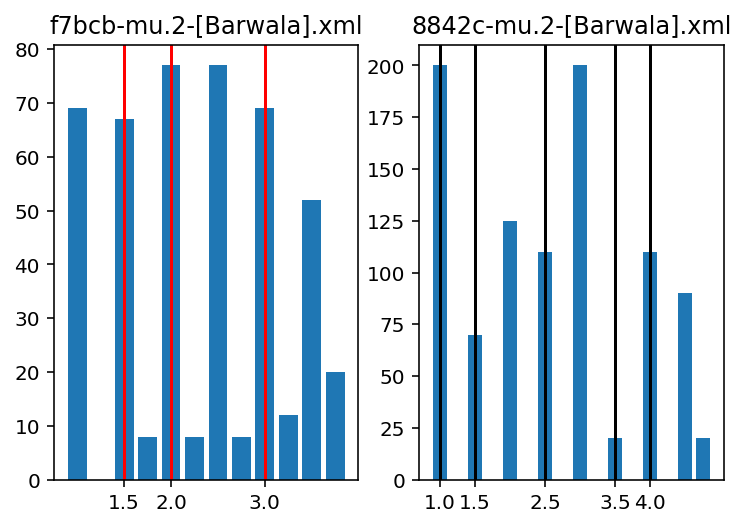

In [26]:
show_pair(score_snippets, crossmizan_pairs[0], 'mu', mizan_dict, nawbas)

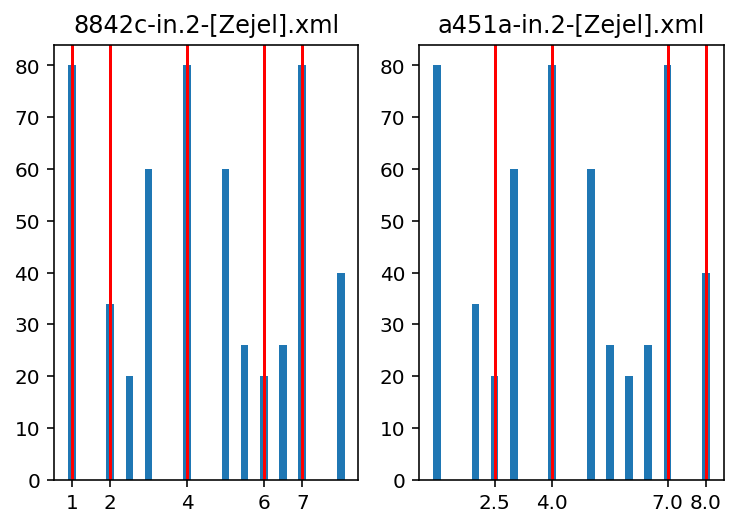

In [16]:
show_pair(score_snippets, crossmizan_pairs[1], 'in', mizan_dict, nawbas)

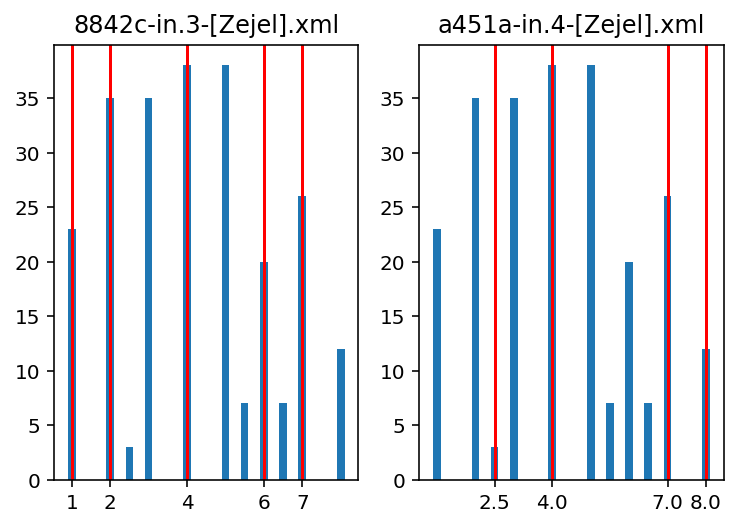

In [17]:
show_pair(score_snippets, crossmizan_pairs[2], 'in', mizan_dict, nawbas)

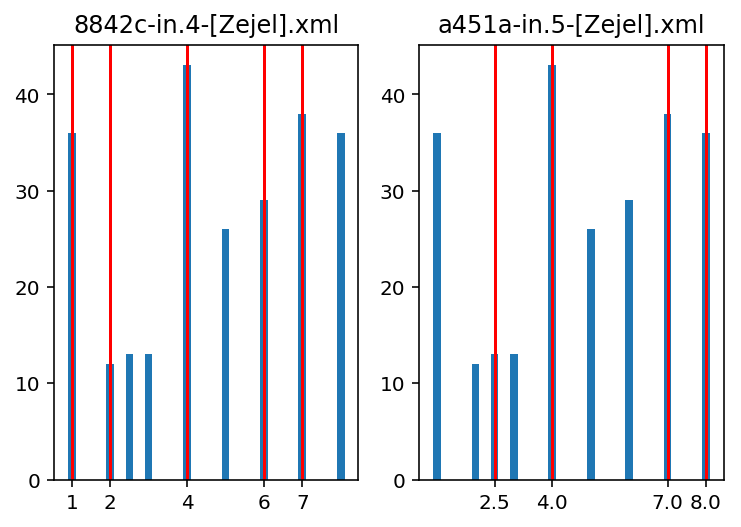

In [18]:
show_pair(score_snippets, crossmizan_pairs[3], 'in', mizan_dict, nawbas)

## Further Analysis: Viewing All Sana'i'

In the cases where there are similarities and the cases where there are differences, finding interpretations for the reasons for these differences was not clear. So, we decided to visualize, with the same methodology, all the Sana'i' within each recording to search for some patterns.

The following functions implement the functionality of analyzing and plotting each san'a in a recording.

In [19]:
#See whether the pattern observed occurs in all sanaas of our 2 recordings.
def get_sanaa_info(sanaa_string, recording_mbid, dataframe): #returns: 1.list of all lines relating to this sanaa, 2. tuple with start and end offsets
    regex_string = sanaa_string + '.*'
    lines = [x[1] for x in dataframe.iterrows() if x[1][0] == recording_mbid
             and re.match(regex_string, x[1][1])]
    return lines, (lines[0]['offset_start'], lines[-1]['offset_end'])

def get_beat_dictionary(scores_path, recording_mbid, score_start_offset, score_end_offset):
    beatsDict = {}
    score = converter.parse(scores_path + recording_mbid + '.xml')
    p = score.parts[0]
    segment = p.getElementsByOffset(score_start_offset, score_end_offset,
                              mustBeginInSpan=False,
                              includeElementsThatEndAtStart=False).stream()
    notes_stream = segment.flat.notes.stream()
    for n in notes_stream:
        beatsDict[n.beat] = beatsDict.get(n.beat, 0) + 1 
    return beatsDict

def get_sanaa_ids(recording_mbid, dataframe): #returns a list of unique sanaa ids
    #we can change this later to get the line annotation details as well
    linesections = (dataframe.loc[dataframe['mbid'] == recording_mbid])['verse_name'].unique()
    return set([l[0:4] for l in linesections])

def get_sanaa_lines_and_offsets(recording_mbid, dataset):
    sanaa_lines = {}   #lines belonging to each sanaa in a recording
    sanaa_offsets = {} #offsets marking the start and end of a sanaa in a recording
    
    all_recordings_sanaa_offsets = {}
    all_recordings_sanaa_lines = {}
    s_ids = get_sanaa_ids(recording_mbid, dataset)
    for s_id in s_ids:
        sanaa_lines[s_id], sanaa_offsets[s_id] = get_sanaa_info(s_id, recording_mbid, dataset)
    return sanaa_offsets, sanaa_lines
    
#load the file
dataset = pd.read_csv(dataset_file)

all_recordings_sanaa_offsets = {}
all_recordings_sanaa_lines = {}

for recording_mbid in nawbas.keys():
    all_recordings_sanaa_offsets[recording_mbid], all_recordings_sanaa_lines[recording_mbid] = get_sanaa_lines_and_offsets(recording_mbid, dataset)

#3. Get the beats dictionary for each sanaa in ONE recording. 
beats_dict_per_sanaa_f7bcb = {}

for key, val in all_recordings_sanaa_offsets['f7bcb9af-6abb-4192-ae3d-37fa811034ce'].items():
    beats_dict_per_sanaa_f7bcb[key] = get_beat_dictionary(score_source_dir, 
                                                          'f7bcb9af-6abb-4192-ae3d-37fa811034ce', val[0], val[1])
    
beats_dict_per_sanaa_8842c1 = {}
for key, val in all_recordings_sanaa_offsets['8842c1f0-e261-4069-bd59-768bb9a3315c'].items():
    beats_dict_per_sanaa_8842c1[key] = get_beat_dictionary(score_source_dir, 
                                                           '8842c1f0-e261-4069-bd59-768bb9a3315c', val[0], val[1])

beats_dict_per_sanaa_a451a7 = {}
for key, val in all_recordings_sanaa_offsets['a451a7fc-c53f-462a-b3fc-4377bb588105'].items():
    beats_dict_per_sanaa_a451a7[key] = get_beat_dictionary(score_source_dir, 
                                                           'a451a7fc-c53f-462a-b3fc-4377bb588105', val[0], val[1])



In [20]:
print(beats_dict_per_sanaa_f7bcb['in.5']) #the insiraf beat info is causing a problem in plotting..

{Fraction(5, 3): 149, 2.0: 58, Fraction(7, 3): 137, 1.0: 139, Fraction(8, 3): 6, Fraction(4, 3): 3}


In [21]:
def plot_all(beats_dict_per_sanaa, recording_mbid, mizan_dict, nawbas): 
    #plots all input elements side by side with their titles
    rows = ceil(len(beats_dict_per_sanaa)/4.0) #to have only 4 per row
    i = 1
    plt.figure(figsize=(20,20))
    plt.suptitle('{}-{}'.format(recording_mbid, nawbas[recording_mbid]), fontsize=24)

    for key, beats_dict in sorted(beats_dict_per_sanaa.items()):
        plt.subplot(rows, 4, i)
        i += 1
        plt.title(key)
        mizan_key = "{}_{}".format(nawbas[recording_mbid], key[0:2])
        reference = mizan_dict[mizan_key]
        
        #plots
        xValues = sorted(beats_dict.keys())
        yValues = [beats_dict[x] for x in xValues]
        
        plt.bar(xValues, yValues, width=0.2)
        # Draw a vertical red line to better compare the results with theory
        for beat in reference:
            plt.axvline(beat, color='red')
        plt.xticks(reference)
    plt.show()
    

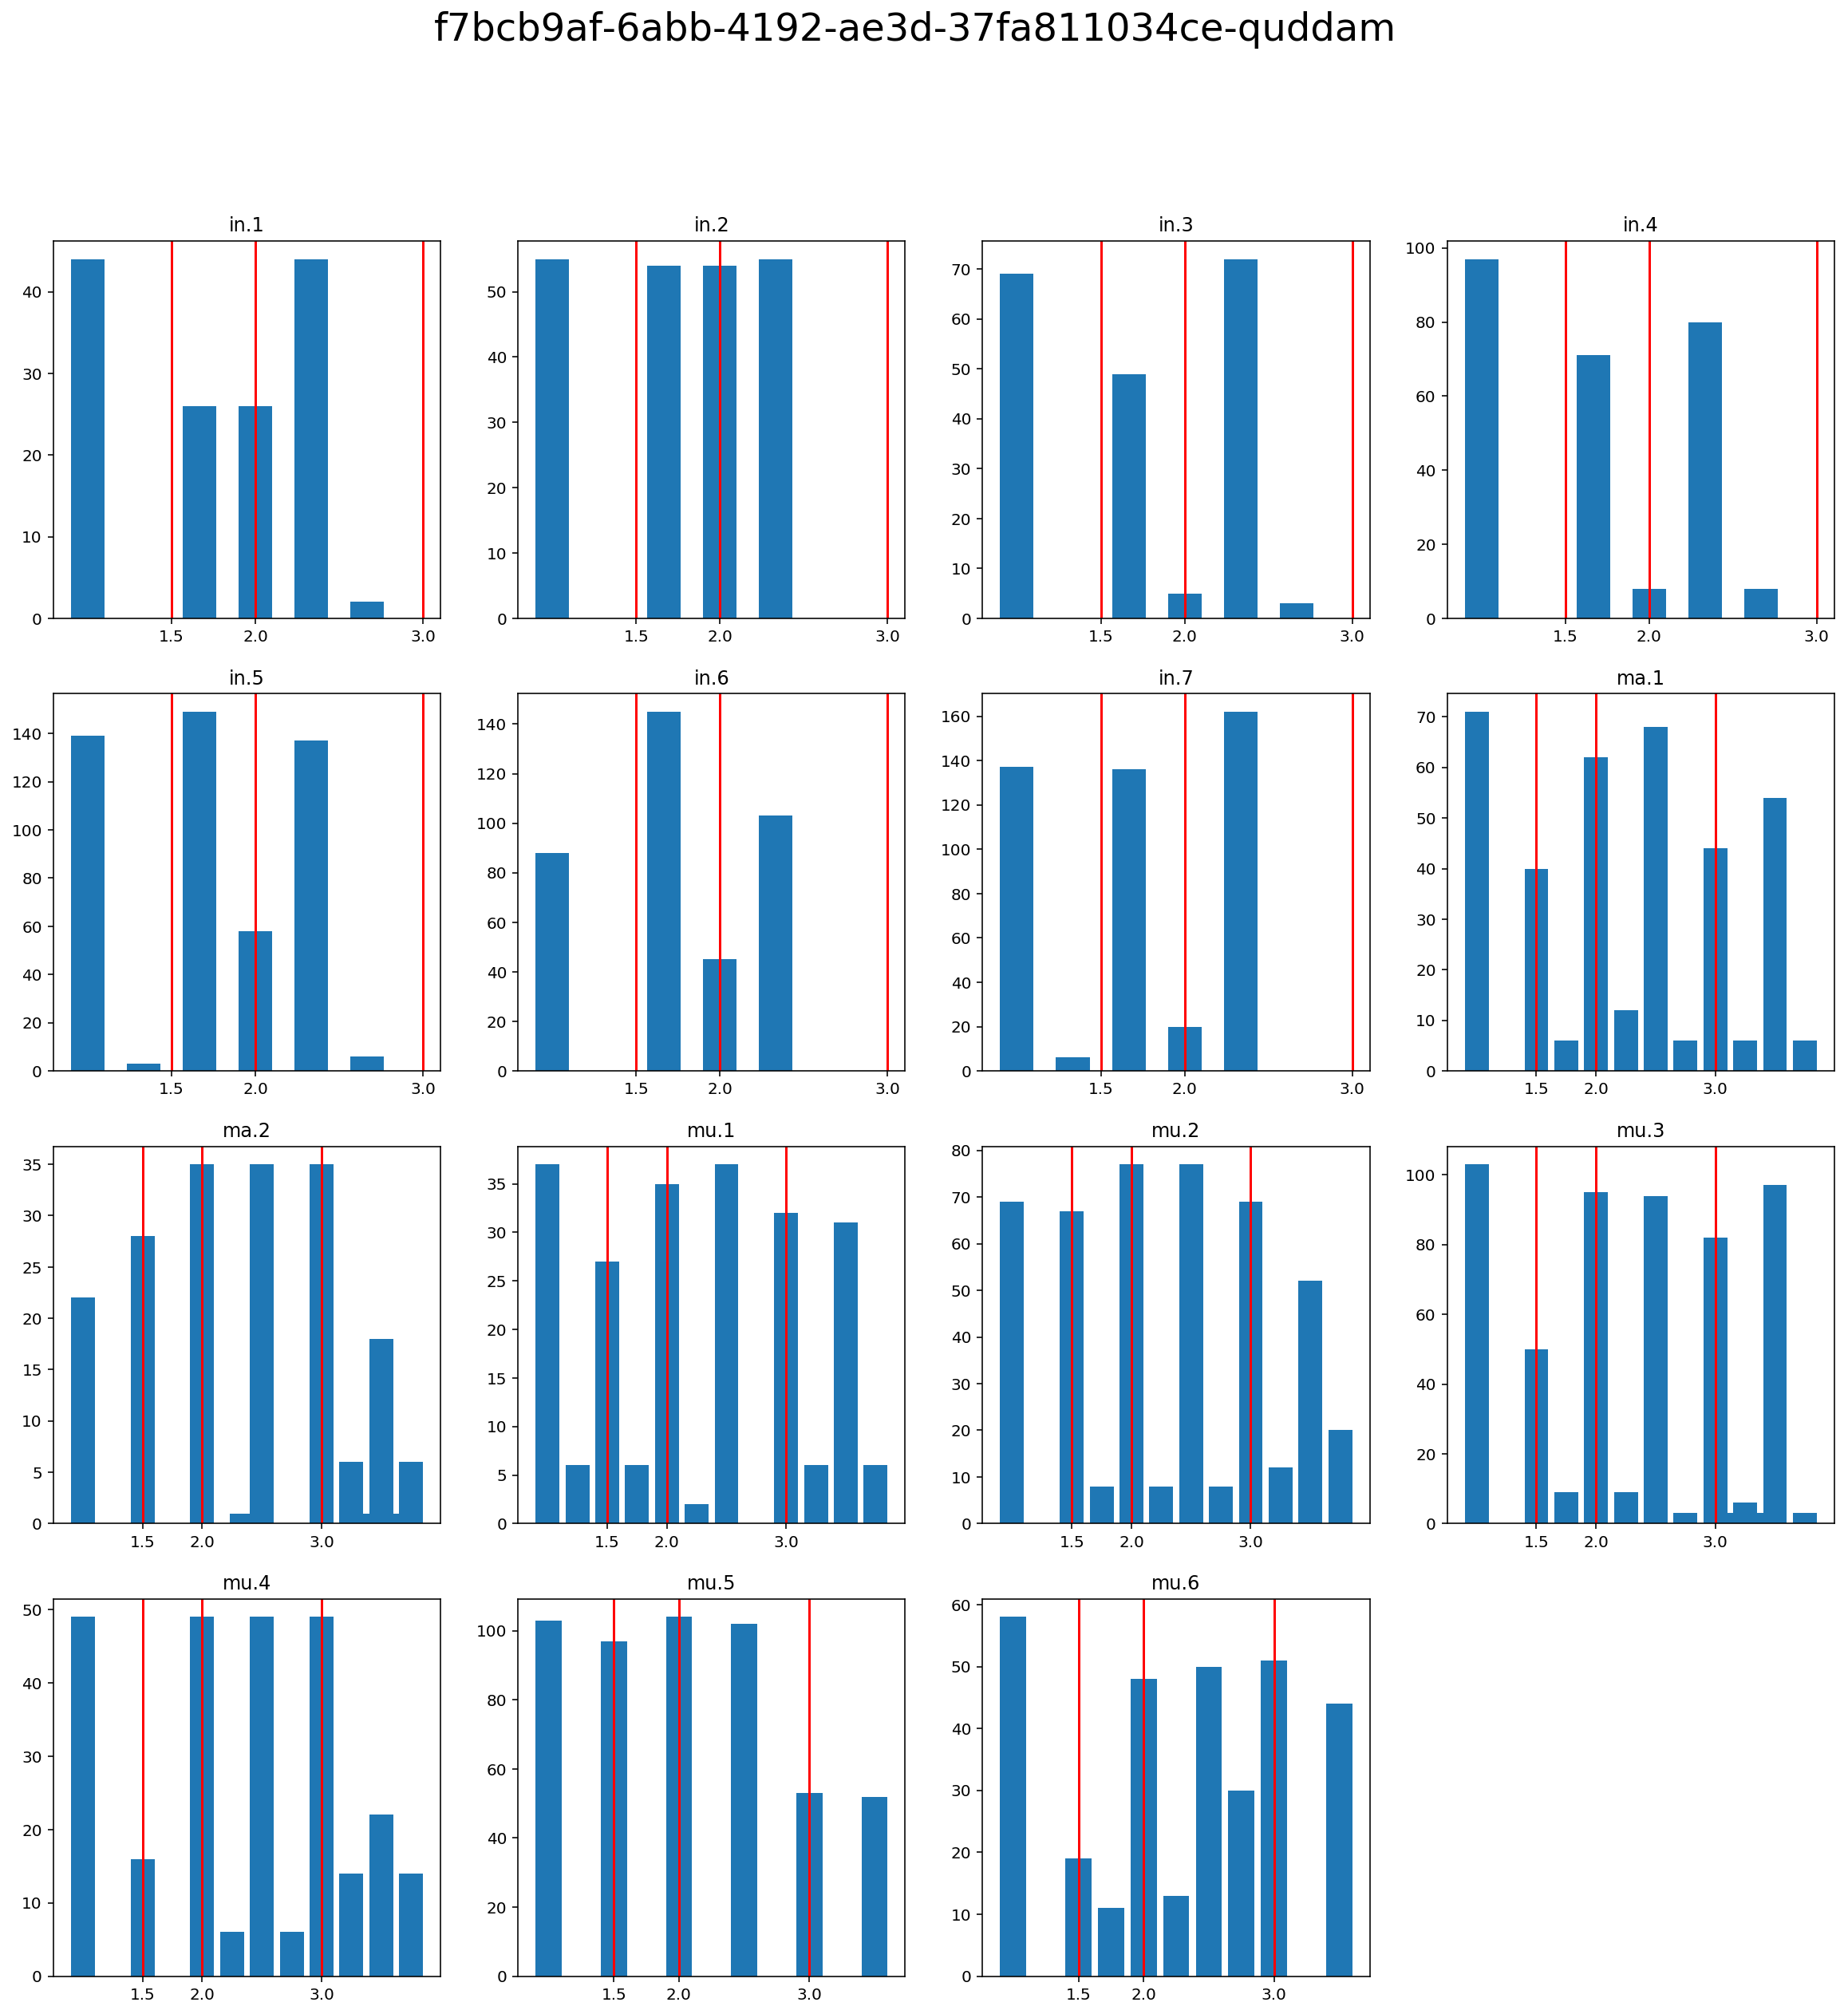

In [22]:
plot_all(beats_dict_per_sanaa_f7bcb, 'f7bcb9af-6abb-4192-ae3d-37fa811034ce', mizan_dict, nawbas)

Here, in the insiraf sana'i', theory is 6/8, and the score is 6/8, but something wrong happens when reading the beats dict. So, we have just changed the array representing the theory to be in 3/4

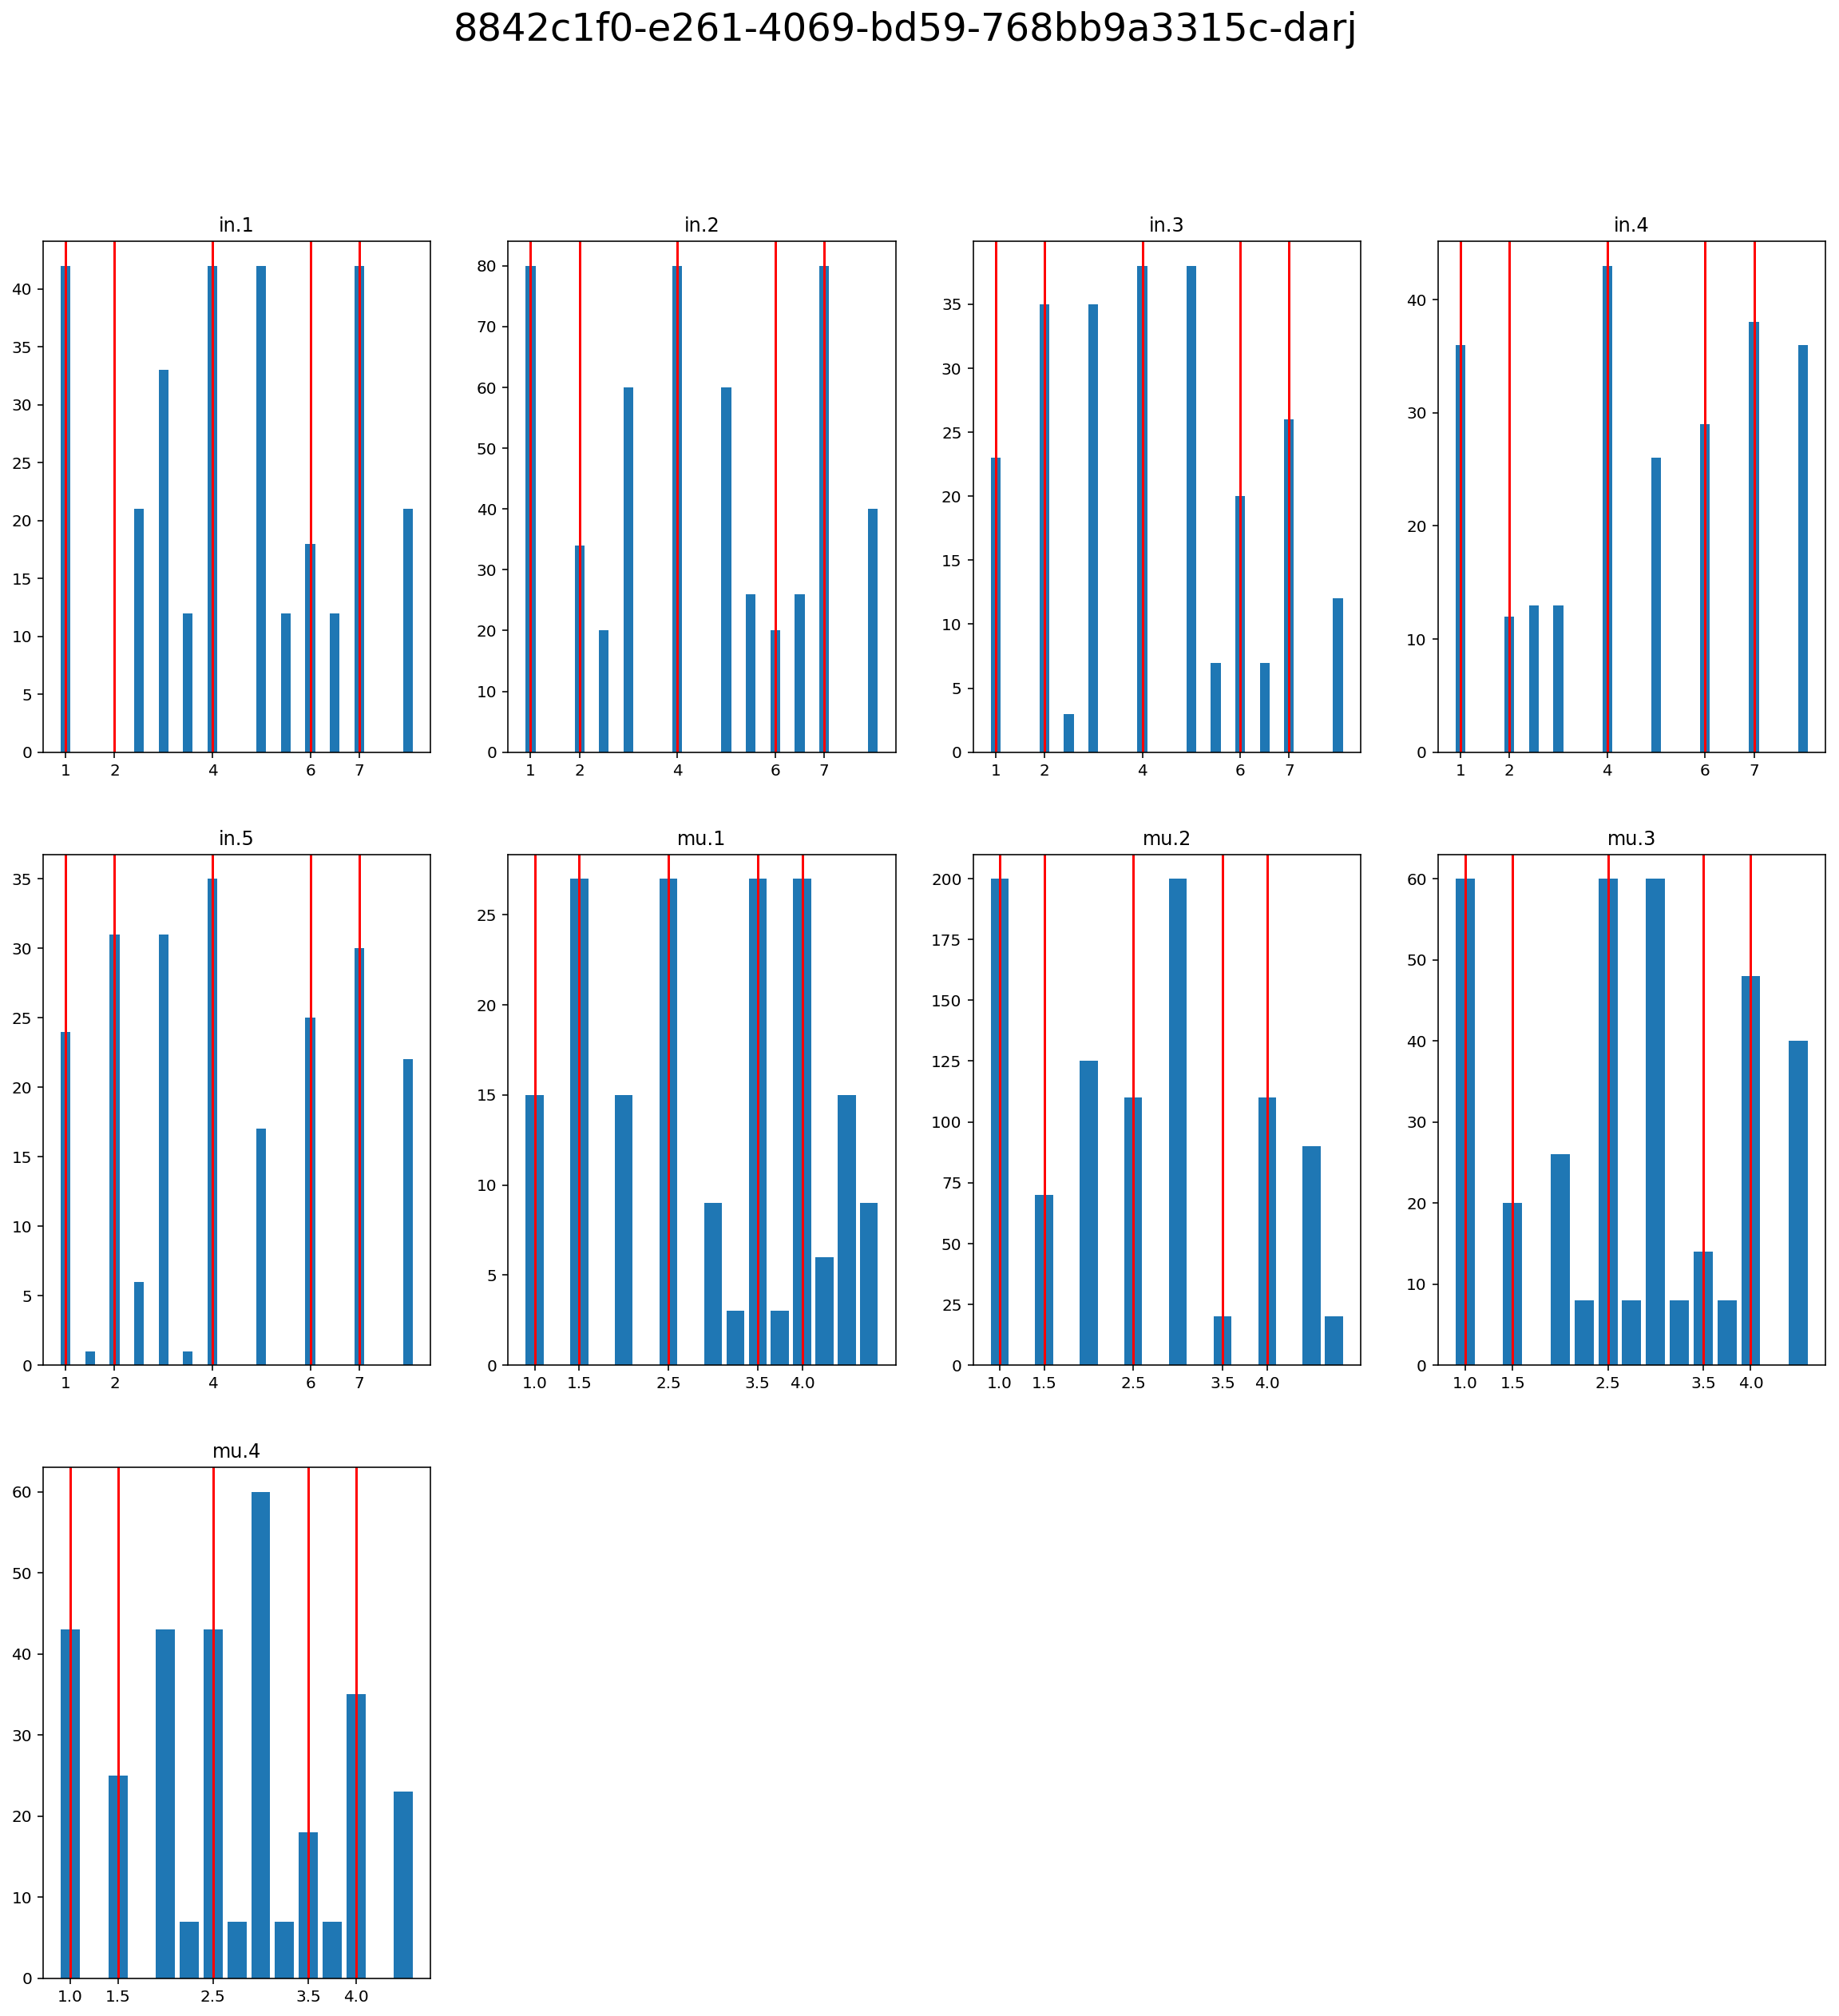

In [23]:
plot_all(beats_dict_per_sanaa_8842c1, '8842c1f0-e261-4069-bd59-768bb9a3315c', mizan_dict, nawbas)


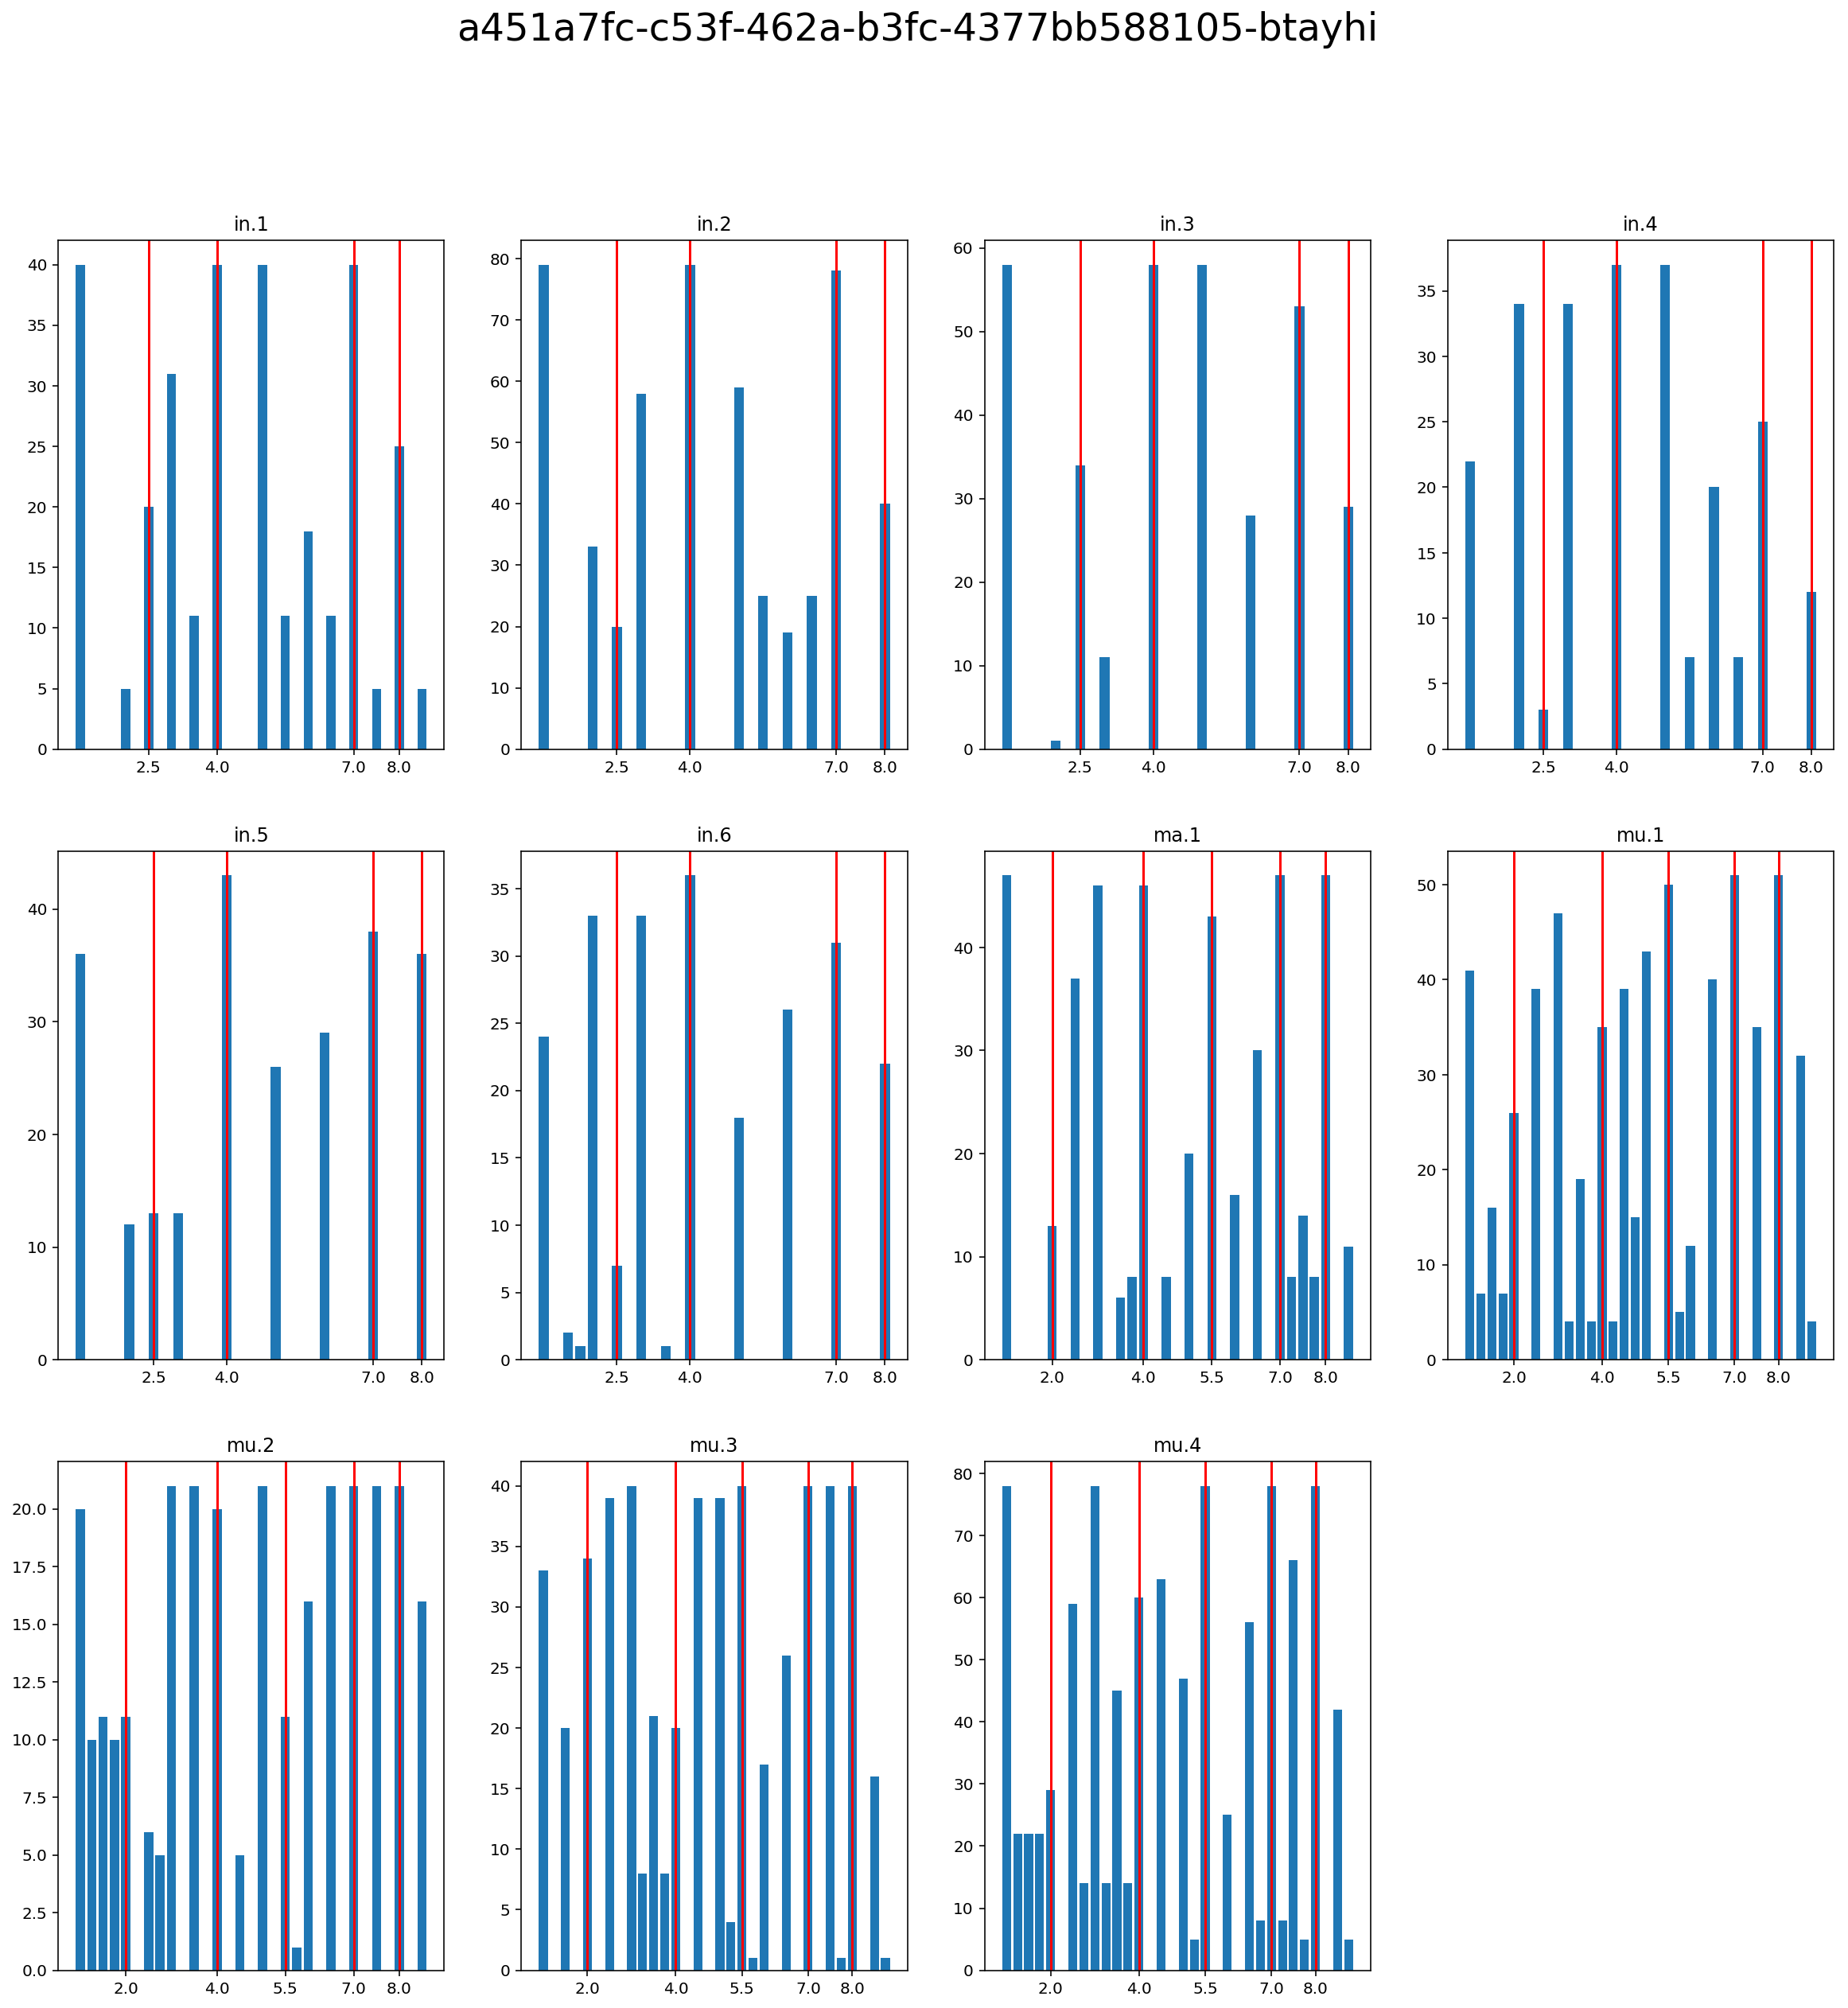

In [24]:
plot_all(beats_dict_per_sanaa_a451a7, 'a451a7fc-c53f-462a-b3fc-4377bb588105', mizan_dict, nawbas)

## Plotting the Second Quddam